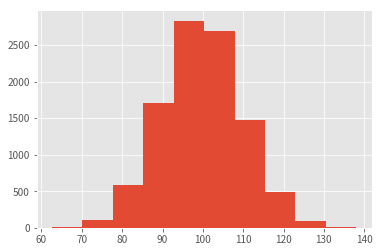

In [2]:
#히스토그램 : Axes.hist()

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#데이터 셋
mu = 100 #평균
sigma = 10 #표준편차
np.random.seed(0)
x = np.random.normal(mu,sigma, 10000)

#히스토그램 그리기
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

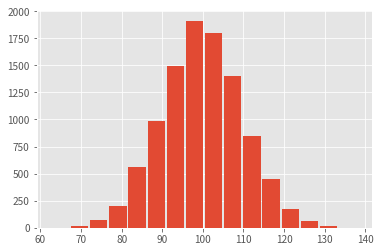

In [3]:
#인수를 설정한 히스토그램

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

In [9]:
import pandas as pd
anime_master_csv = './anime/anime_master.csv'

df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


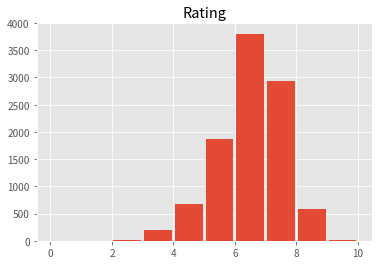

In [6]:
#평점 시각화

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['rating'], range=(0,10), rwidth=0.9)
ax.set_title('Rating')

plt.show()

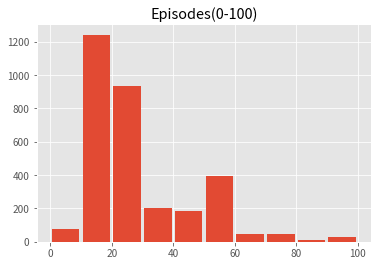

In [8]:
#범위 지정을 해야하는 경우 (처음계급으로 몰리는 잘못된거 수정)
 # range값을 수정하면 된다.
    
fig = plt.figure()
ax = fig.add_subplot(111)
df_tv = df[df['type'] == 'TV']

#range 값을 (0,100) 으로 지정
ax.hist(df_tv['episodes'], rwidth=0.9, range=(0,100))
ax.set_title("Episodes(0-100)")

plt.show()

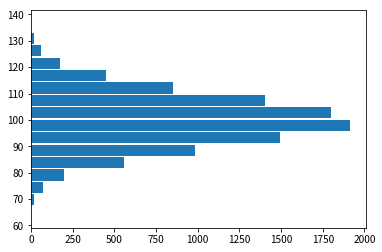

In [11]:
#수평
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.normal(100, 10, 10000)
fig = plt.figure()
ax = fig.add_subplot(111)

#orientation을 horizontal로 지정
ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')

plt.show()

C:\Users\ysang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


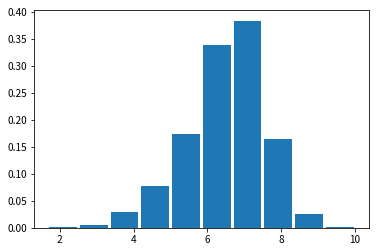

In [12]:
#상대도수 (데이터 수가 다른 다른 그룹의 히스토그램과 비교)


fig = plt.figure()
ax = fig.add_subplot(111)

#normed을 True로 지정
ax.hist(df['rating'], normed=True, rwidth=0.9)
#누적은 중간 인수에 cumulative=True 조건을 주자

plt.show()

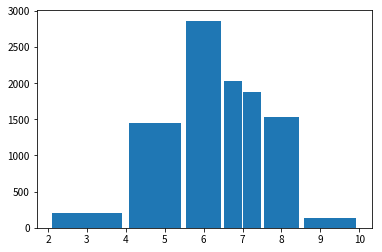

In [14]:
#계급 폭 지정
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['rating'], bins =[2,4,5.5,6.5,7,7.5,8.5,10], rwidth=0.9)

plt.show()

C:\Users\ysang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


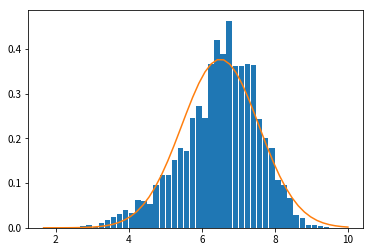

In [16]:
#근사 곡선 추가

bins = 50 #막대수
dfmin = np.min(df['rating']) #데이텇 최소값
dfmax = np.max(df['rating']) #데이터 최대값

#히스토그램 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins= bins, range = (dfmin, dfmax), normed = True, rwidth = 0.9)

#평균과 표준편차
mu, sigma = df['rating'].mean(), df['rating'].std()

#X값
x = np.linspace(dfmin, dfmax, bins) #막대 단락 값

#근사적 확률밀도함수를 사용해 Y값 생성
y = 1 / (sigma * np.sqrt(2* np.pi)) * np.exp(-(x-mu)**2 / (2 * sigma**2))

#근사곡선 그리기
ax.plot(x,y)

plt.show()

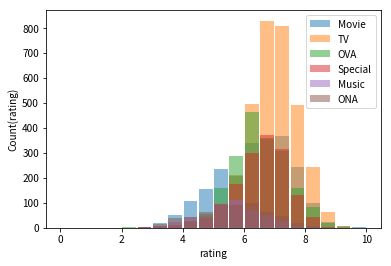

In [19]:
#여러 그룹 겹쳐서 그리기

types = df['type'].unique()
labels = types.tolist()

fig = plt.figure()
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type']==t, 'rating'],
    bins=b_num,
    rwidth=0.9,
    alpha=0.5, #투명도. 0은 투명, 1은 불투명
    label=t)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()


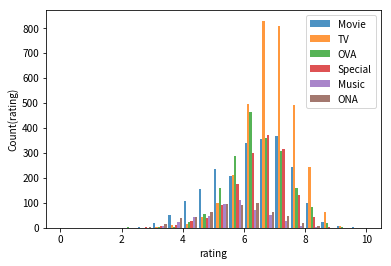

In [20]:
#여러 그룹을 나열하기

#데이터 세트
dataset = [df.loc[df['type'] ==t, 'rating'] for t in types]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(dataset,
       bins=np.arange(0, 10.5, 0.5),
       rwidth=0.9,
       alpha=0.8,
       label=labels)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()
